# Drawing points part 2: mapping a column of numbers

In part 2, I will show you how to map the points according to a column of a variable, such as the number of users in a station, the capacity of a building, etc. 

The following will cover:

1. mpoint.map_sequence by_colour: using the same logic as the map_sequence for polygon, this will map the points using differen colours according to a variable column
2. mpoint.map_sequence by_size: similar as the above, that leveling the column, and convert them to sizes, which can also be converted gradually (not leveling)
3. mpoint.map_sequence by_colour & by_size: do the above two in the same time, that one level has one color and one size. 
4. use special icons instead of simple dot/circle/square markers. 


## make a Point GeoDataFrame

In this tutorial, first, the data from the make_sequential_map.ipynb will be used, the geometry will be change to the centroid point of each cell. So, the first part is to show you how to generate a Point GeoDataFrame. 

as usual, import modules that will be used

In [1]:
import geopandas as gpd # read and manage attribute table data
from shapely.geometry import Point

import matplotlib.pyplot as plt # prepare the figure
import colouringmap.mapping_point as mpoint # for drawing points
import colouringmap.mapping_polygon as mpoly # for mapping background polygon
import colouringmap.markerset as ms # getting more marker icons

#from random import random # just for creating a random colour for demonstration

# the projection of the map, the data is in wgs84(epsg:4326), so need a proj dict for conversion
proj = {u'lon_0': 138, u'ellps': u'WGS84', u'y_0': 0, u'no_defs': True, u'proj': u'eqdc', u'x_0': 0, u'units': u'm', u'lat_2': 40, u'lat_1': 34, u'lat_0': 0}

## magic line for matplotlib
%matplotlib inline

In [2]:
grid_res = gpd.read_file('data/community_results.shp')
grid_res.head()

,com,geometry,node,tweets,usercount,xcor,ycor
0,14,"POLYGON ((175239.9457184017 3947195.841823581,...",0,1,1,139.939807,35.640542
1,56,"POLYGON ((175239.9457767347 3947695.841815081,...",1,0,0,139.939919,35.645048
2,1,"POLYGON ((142239.9457464929 3956695.841823446,...",10,35,21,139.576848,35.731640
3,18,"POLYGON ((144239.9457266586 3959695.841818351,...",100,40,32,139.599535,35.758373
4,4,"POLYGON ((154239.9457194024 3947195.841822605,...",1000,1898,660,139.707733,35.644166


The data included two columns: xcor, ycor, which is in latitude and longitude. So, lets use it.

In [3]:
px = grid_res.xcor.tolist()
py = grid_res.ycor.tolist()
pts = [ Point(xx,yy) for xx,yy in zip(px,py) ]

prepare a pandas dataframe:

In [4]:
df = grid_res[['com', 'node', 'tweets', 'usercount']]

In [5]:
pts_res = gpd.GeoDataFrame(df, geometry=pts, crs={'init': u'epsg:4326'})
pts_res = pts_res.to_crs(proj)

## prepare the map

In [6]:
borders = gpd.read_file('data/tokyo_special_ward.shp')
borders = borders.to_crs(proj) # convert the borders projection to the proj
borders.head()

,CC_1,CC_2,ENGTYPE4,ENGTYPE_1,ENGTYPE_2,ENGTYPE_3,ENGTYPE_4,ENGTYPE_5,HASC_1,HASC_2,...,VALIDFR_4,VALIDTO_1,VALIDTO_2,VALIDTO_3,VALIDTO_4,VARNAME_1,VARNAME_2,VARNAME_3,VARNAME_4,geometry
0,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,(POLYGON ((159220.1001122429 3944762.073823004...
1,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,(POLYGON ((158999.8592399163 3944572.170247176...
2,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,"POLYGON ((146781.2544537511 3960582.761038371,..."
3,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,"POLYGON ((152959.7019310016 3951980.543103506,..."
4,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,(POLYGON ((157668.1722097479 3936121.598554492...


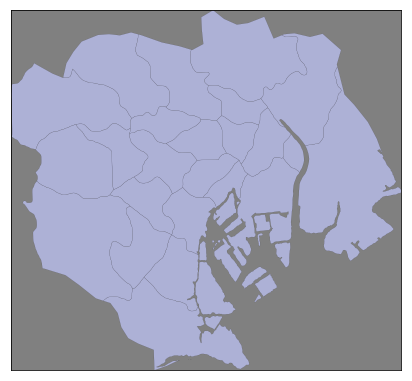

In [7]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')

before actually styling the points using the column, lets scatter the Point GeoDataFrame and take a look.

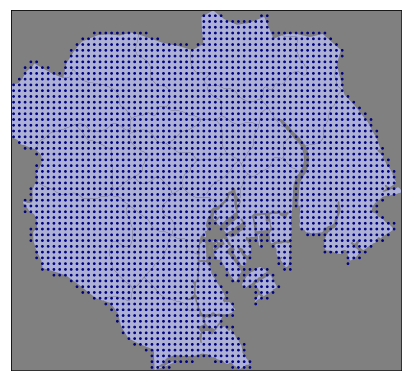

In [8]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_scatter(pts_res, ax, extend_context=False)

## changing the size according to a column

If neither the by_colour nor by_size is set to True, then map_sequence will also use the map_scatter, and the column will be neglected. 

no styling(by_colour and/or by_size) is True, use map_scatter


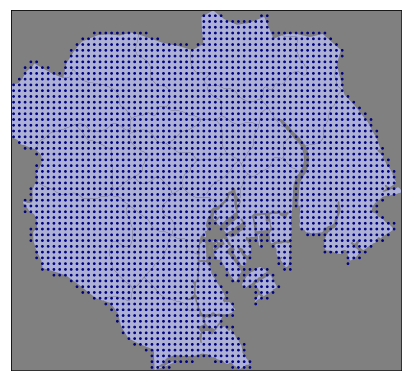

In [9]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_sequence(pts_res, 'usercount', ax, extend_context=False)

### map the points variable by  colour

The following show how to use the by_colour=True to show the points.

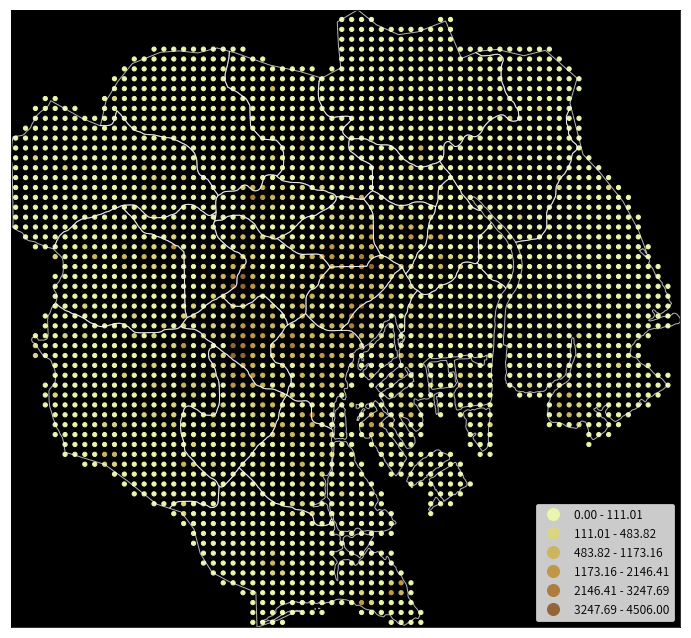

In [36]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='k')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='none')
ax = mpoint.map_sequence(pts_res, 'usercount', ax, extend_context=False,
                         by_colour=True, marker='o', sizes=18, 
                         break_method='head_tail_break',
                         legend_loc='lower right')
ax = mpoly.add_border(borders, ax, lw=1, ec='w', alpha=.7)

### map the points variable by size

The following use one colour for all points, but different sizes according to the breaking levels.

NOTE that the sizes is a list of two number, the minumum size, and the maximum size. 

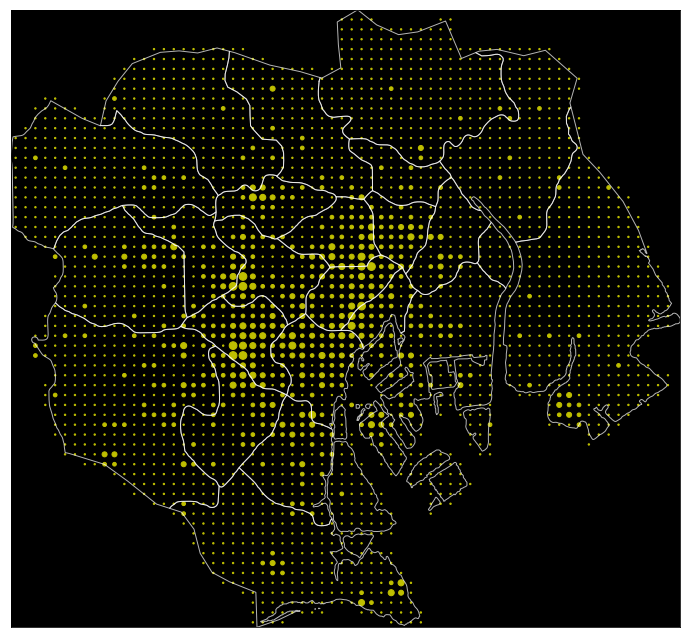

In [33]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='k')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='none')
ax = mpoint.map_sequence(pts_res, 'usercount', ax, extend_context=False,
                         by_size=True, marker='o', facecolor='y',
                         break_method='head_tail_break', sizes=[2,60],
                         legend_loc='lower right')
ax = mpoly.add_border(borders, ax, lw=1, ec='w', alpha=.7)

### 2 in 1: both colour and size

The following set the by_size and by_colour to True.

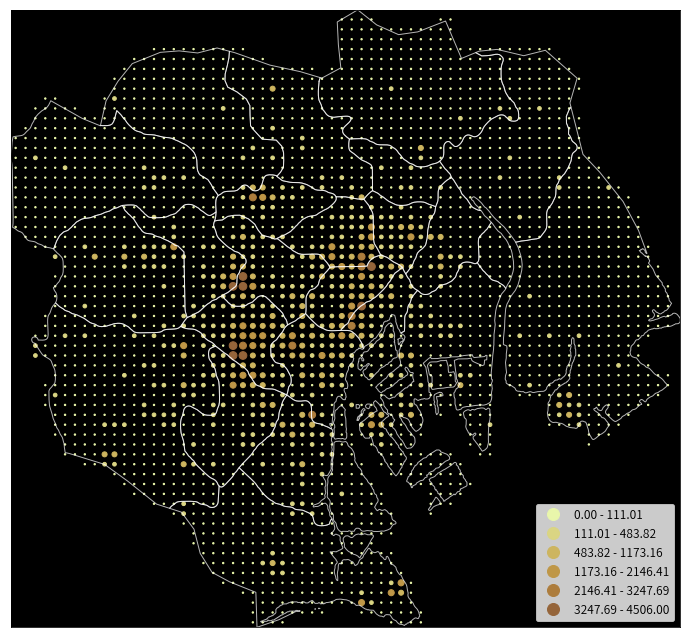

In [34]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='k')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='none')
ax = mpoint.map_sequence(pts_res, 'usercount', ax, extend_context=False,
                         by_size=True, by_colour=True,
                         marker='o',
                         break_method='head_tail_break', sizes=[2,60],
                         legend_loc='lower right')
ax = mpoly.add_border(borders, ax, lw=1, ec='w', alpha=.7)

The sizing is set to "graduated" in the below cell (by default is "level", as shown in above).

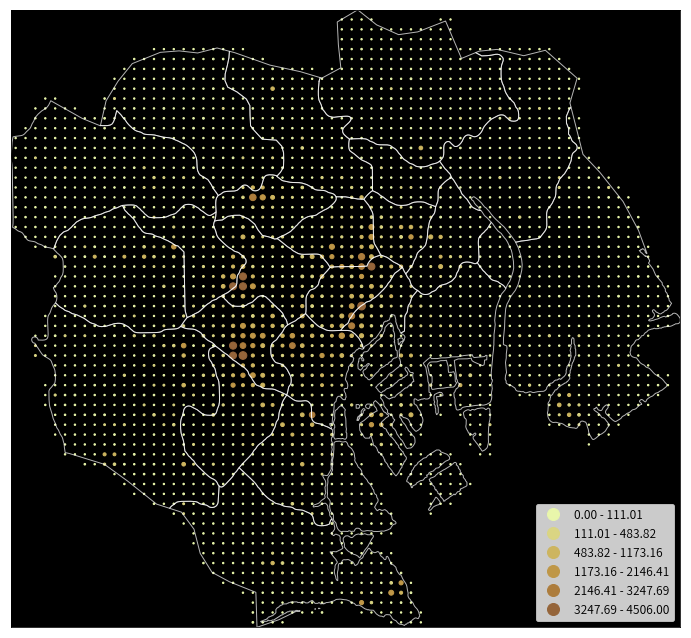

In [39]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='k')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='none')
ax = mpoint.map_sequence(pts_res, 'usercount', ax, extend_context=False,
                         by_size=True, by_colour=True,
                         sizing='graduated',
                         marker='o',
                         break_method='head_tail_break', sizes=[2,60],
                         legend_loc='lower right')
ax = mpoly.add_border(borders, ax, lw=1, ec='w', alpha=.7)

## this function supports the icons also

Lets try the special icon for the marker parameter in the map_sequence.

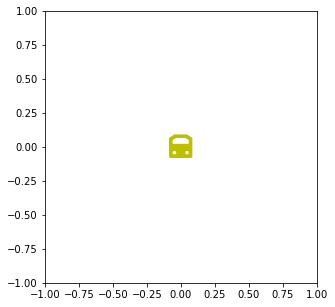

In [44]:
rail_icon = ms.get_marker('maki', 'rail')
ms.show_icon(rail_icon, size=36, face_colour='y')

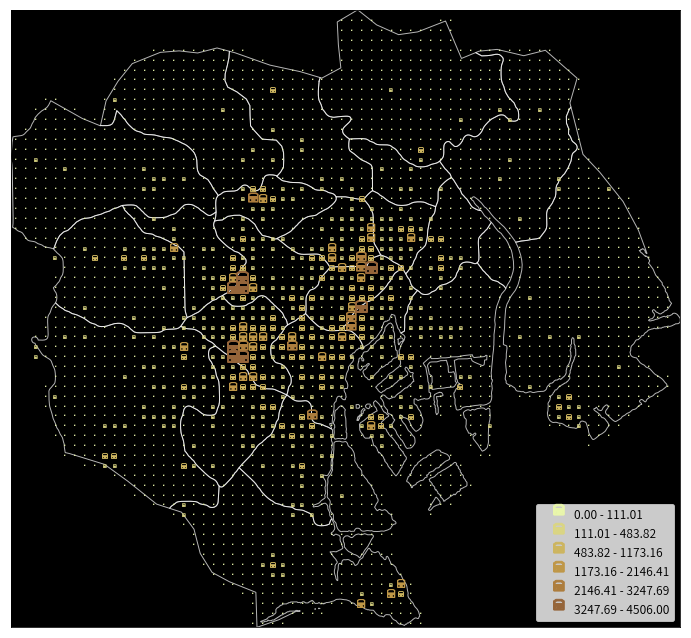

In [45]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='k')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='none')
ax = mpoint.map_sequence(pts_res, 'usercount', ax, extend_context=False,
                         by_size=True, by_colour=True,
                         marker=rail_icon,
                         break_method='head_tail_break', sizes=[2,20],
                         legend_loc='lower right')
ax = mpoly.add_border(borders, ax, lw=1, ec='w', alpha=.7)

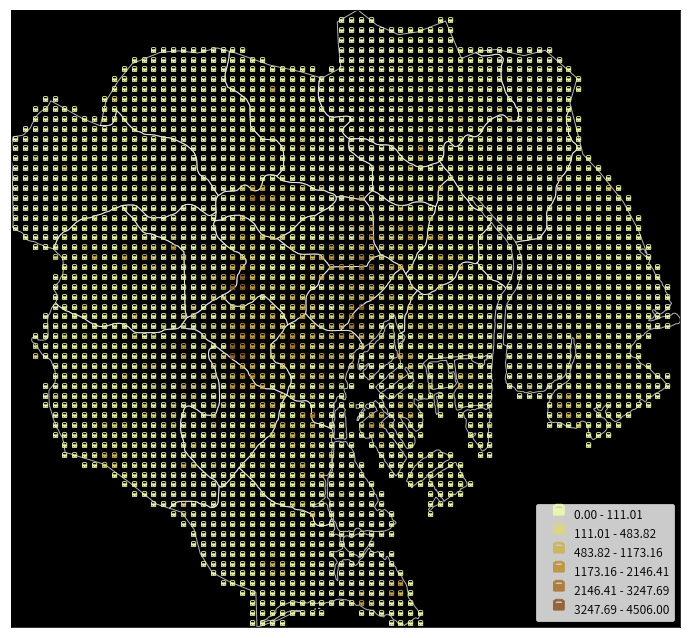

In [47]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='k')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='none')
ax = mpoint.map_sequence(pts_res, 'usercount', ax, extend_context=False,
                         by_colour=True, marker=rail_icon, sizes=8, 
                         break_method='head_tail_break',
                         legend_loc='lower right')
ax = mpoly.add_border(borders, ax, lw=1, ec='w', alpha=.7)

The result with a special marker can be disaster (as shown in above). So, please take more tries before finalizing the map. And if it is not looking better, I think it is better to use a simple marker ('o', 's' etc.).